<a href="https://colab.research.google.com/github/f4ieh/object_detection/blob/main/object_detection_perso_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




<hr style="border-width:2px;border-color:#75DFC1">
<h1 style = "text-align:center" > Détection d'objets </h1>
<h2 style = "text-align:center" > Open-Images et fine-tuning </h2>
<hr style="border-width:2px;border-color:#75DFC1">

> Les exercices précédents étaient destinés à présenter le fonctionnement de quelques modèles d'objet détection, ainsi que l'inférence d'un modèle de détection d'objet. Intéressons nous maintenant à un vrai jeu de données de détection d'objets, ainsi que l'entraînement d'un modèle pré-entraîné.
>
> La thématique sera la détection des personnes ainsi que leur visage.
>
><img src="https://assets-datascientest.s3.eu-west-1.amazonaws.com/notebooks/object_detection_sample_pred.png" style="height:500px">

### Structure de l'exercice

>**1. Chargement des données** : utilisation de l'API fiftyone, exportation des données, format CoCo.
>
>
>**2. Préparation des données** : transformer et normaliser les données pour les modèles de tensorflow, générateur de données personnalisé.
>
>
> **3. Modélisation** : Importer et configurer un modèle de l'API de détection d'objets de tensorflow, Fine tune, évaluation du modèle.

### Utiliser une marchine avec GPU

>* Aller dans Edit/Notebook setting.
>
><img src='https://assets-datascientest.s3-eu-west-1.amazonaws.com/notebooks/colab_gpu_01.png'>
>
> * Vous pouvez ensuite choisir si vous désirez utiliser un GPU. Appuyer sur `SAVE` pour valider votre choix.
>
><img src='https://assets-datascientest.s3-eu-west-1.amazonaws.com/notebooks/colab_gpu_02.png'>
>
> Attention vous allez être basculer sur une nouvelle machine, et vous ne pouvez pas dépasser 12h/jour d'utilisation.

⚠ ⚠ ⚠ ```
Attention les cellules suivantes peuvent prendre quelques minutes pour s'exécuter. Et, activer bien 
``` ⚠ ⚠ ⚠

* **(a)** Exécuter les cellules suivantes pour installer les packages nécessaires.

In [1]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 76089, done.
remote: Counting objects: 100% (551/551), done.
remote: Compressing objects: 100% (305/305), done.
remote: Total 76089 (delta 304), reused 464 (delta 243), pack-reused 75538
Receiving objects: 100% (76089/76089), 589.61 MiB | 32.68 MiB/s, done.
Resolving deltas: 100% (53937/53937), done.


In [2]:
# Install the Object Detection API
%%bash
cd models/research/
protoc object_detection/protos/*.proto --python_out=.
cp object_detection/packages/tf2/setup.py .
python -m pip install .

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/models/research
  Created wheel for object-detection: filename=object_detection-0.1-py3-none-any.whl size=1694955 sha256=4075de345bb1e89f291d175924af6268f06815e9111e13c05c2da9b5b6c93505
  Stored in directory: /tmp/pip-ephem-wheel-cache-qrdytws2/wheels/fa/a4/d2/e9a5057e414fd46c8e543d2706cd836d64e1fcd9eccceb2329
  Created wheel for py-cpuinfo: filename=py_cpuinfo-8.0.0-py3-none-any.whl size=22257 sha256=482f89ce7c8a10e7676d6862c794fb896208a776f3f48afc7b719f874ea546d7
  Stored in directory: /root/.cache/pip/wheels/d2/f1/1f/041add21dc9c4220157f1bd2bd6afe1f1a49524c3396b94401
  Created wheel for dill: filename=dill-0.3.1.1-py3-none-any.whl size=78544 sha256=d5fe598ff8cffc5e04732fcc795a8cf0c668981afcc8e85ae7dfcdd66cd3ed62
  Stored in directory: /root/.cache/pip/wheels/a4/61/fd/c57e374e580aa78a45ed78d5859b3a44436af17e22ca53284f
  Created wheel for avro-python3: filename=avro_p

  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gym 0.17.3 requires cloudpickle<1.7.0,>=1.2.0, but you have cloudpickle 2.1.0 which is incompatible.


In [ ]:
# Install right version tensorflow and fiftyone
!pip install tensorflow==2.7.0
!pip install opencv-python-headless==4.5.4.60 fiftyone
!pip install fiftyone --no-binary fiftyone,voxel51-eta
# Restart the runtime
import os
os.kill(os.getpid(), 9)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 665.5 MB 22 kB/s 
     |████████████████████████████████| 463 kB 4.6 MB/s 
     |████████████████████████████████| 1.3 MB 45.4 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.9.1
    Uninstalling tensorflow-2.9.1:
      Successfully uninstalled tensorflow-2.9.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-models-official 2.9.2 requ

⚠ ⚠ ⚠ ```
Attention, comme une réinitialisation du kernel est faite, il est nécessaire d'attendre l'execution avant de lancer une autre cellule de code.
``` ⚠ ⚠ ⚠


<hr style="border-width:2px;border-color:#75DFC1">
<h2 style = "text-align:center" > 1. Chargement des données </h2>
<hr style="border-width:2px;border-color:#75DFC1">

## Jeu de données Open-Image

> Pour rappel, [Open Images](https://storage.googleapis.com/openimages/web/index.html) comporte 8M d'images de toutes sortes avec les annotations de l'emplacement des objets. Des informations sur la segmentation sont également présentes pour une partie d'entre elles.
>
> Les auteurs du jeu de données mettent à disposition une API **[fiftyone](http://fiftyone.ai/)** ainsi qu'un outil avancé de visualisation.
>
> La fonction `load_zoo_dataset` de **`fiftyone.zoo`** ne contient pas que le jeu de données 'open-images-v6'.Il permet aussi de récupérer et piocher dans les jeux de données les plus célèbre.

* **(b)** Exécuter la cellule suivante pour afficher les jeux de données disponibles depuis l'API.

In [1]:
import fiftyone.zoo as foz
# List available zoo datasets
print(foz.list_zoo_datasets())

NumExpr defaulting to 2 threads.


/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


Migrating database to v0.16.5
['activitynet-100', 'activitynet-200', 'bdd100k', 'caltech101', 'caltech256', 'cifar10', 'cifar100', 'cityscapes', 'coco-2014', 'coco-2017', 'fashion-mnist', 'fiw', 'hmdb51', 'imagenet-2012', 'imagenet-sample', 'kinetics-400', 'kinetics-600', 'kinetics-700', 'kinetics-700-2020', 'kitti', 'lfw', 'mnist', 'open-images-v6', 'quickstart', 'quickstart-geo', 'quickstart-video', 'ucf101', 'voc-2007', 'voc-2012']


> La fonction `load_zoo_dataset` permet alors :
>
> * **Sélectionner votre jeu de données** parmis la liste précédement affichée.
>
>
> * Choisir le **split du jeu de données** : {'train', 'test', 'validation}
>
>
> * Choisir le **type de label souhaité** : {'classifications', 'detections', 'relationships', 'segmentations'}
>
>
> * Choisir les **classes d'objets** que contiennent les images (chat, chien...). L'[outil d'exploration](https://storage.googleapis.com/openimages/web/visualizer/index.html?set=train&type=detection&c=%2Fm%2F02p0tk3) d'open-image permet de se faire une idée.
>
>
> * **Limiter le nombre d'échantillon** à charger.
>
>
> ```python
>dataset = fiftyone.zoo.load_zoo_dataset(
              "open-images-v6",                           # Name of dataset
              split="validation",                         # Split of the dataset
              label_types=["detections", "segmentations"], # label types
              classes=["Cat", "Dog"],       # Classe of objects
              max_samples=100,                            # Max smaples
              drop_existing_dataset=True                  # Drop the name of existing dataset
          )
>```

* **(c)** Charger sous le nom **`dataset`** un jeu de données provenant de **`'open-images-v6'`**, sur le split **`'validation'`**, avec uniquement le label **`'detections'`**, sur les classes **`["Human head", "Human body"]`**, avec une limite de **`1000`** de samples, et **enlever les datasets existants**.

In [2]:
import fiftyone
# Insérer votre code ici



In [3]:
import fiftyone


# Load the COCO-2017 validation split into a FiftyOne dataset
dataset = fiftyone.zoo.load_zoo_dataset(
              "open-images-v6",                           # Name of dataset
              split="train",                         # Split of the dataset
              label_types=["detections"],# label types
              classes=["Football helmet"],                     # Classe of objects , "Human body"
              max_samples=1000,                            # Max smaples
              drop_existing_dataset=True                  # Drop the name of existing dataset
          )

 100% |██████|    4.8Gb/4.8Gb [2.6s elapsed, 0s remaining, 1.8Gb/s]        
 100% |█████████████████| 1000/1000 [1.3m elapsed, 0s remaining, 13.4 files/s]      
Dataset info written to '/root/fiftyone/open-images-v6/info.json'
Loading 'open-images-v6' split 'train'
 100% |███████████████| 1000/1000 [19.2s elapsed, 0s remaining, 43.4 samples/s]      
Dataset 'open-images-v6-train-1000' created


> Un dataset provenant de fiftyone est composé de `Sample` : chacun correspond à une image ainsi que les informations sur l'annotation.
>
> Il est possible d'itérer pour les récupérer : 
>
> ```python
>for sample in dataset :
>    [...]
>```
>
>Il existe aussi la méthode `first` permettant de récupérer le premier `Sample` du jeu de données.

* **(d)** Afficher le premier Sample du jeu de données **`dataset`**.

In [4]:
# Insérer votre code ici



In [5]:
dataset.first()

<Sample: {
    'id': '62f4d948731df2b3275b2e76',
    'media_type': 'image',
    'filepath': '/root/fiftyone/open-images-v6/train/data/00068e29e2ae4789.jpg',
    'tags': BaseList(['train']),
    'metadata': None,
    'detections': <Detections: {
        'detections': BaseList([
            <Detection: {
                'id': '62f4d948731df2b3275b2e24',
                'attributes': BaseDict({}),
                'tags': BaseList([]),
                'label': 'Boy',
                'bounding_box': BaseList([0.1275, 0.119137, 0.49625, 0.805816]),
                'mask': None,
                'confidence': None,
                'index': None,
                'IsOccluded': True,
                'IsTruncated': True,
                'IsGroupOf': True,
                'IsDepiction': True,
                'IsInside': True,
            }>,
            <Detection: {
                'id': '62f4d948731df2b3275b2e25',
                'attributes': BaseDict({}),
                'tags': BaseList([]),
 

> Les objets `Sample` peuvent être manipulés comme des dictionnaires. Il est alors facile de récupérer le chemin vers l'image ainsi que les objets labélisés.
>
>
> Ce format de données est particulié à l'API **`fiftyone`**, c'est pourquoi nous allons choisir ici de les convertir en **format CoCo**, le format le plus couramment utilisé pour stocker les labels en détection d'objets.
>
> Pour cela, la méthode `export` de l'objet **`dataset`** exporte les images ainsi que stocke la labélisation dans un fichier json.
>
>```python
>dataset.export(
>    export_dir=folder_export, # Folder export data
>    dataset_type=fiftyone.types.COCODetectionDataset # Format of label file
>)
>```
> Les données seront exportées dans le folder_export sous la structure suivante : 
>
>```
│─── folder_export
│   └───data
│       │   7166544280_9d975c4d9a_n.jpg
│       │   6958243974_8851425ddb_n.jpg
│       │   8729501081_b993185542_m.jpg
│       │    ...
│   └───labels.csv
>```

* **(e)** Exécuter la cellule suivante pour exporter les données dans le dossier *dataset_train*.

In [6]:
import os
folder_data = "./dataset_train/"
# Export data to CoCo format
dataset.export(
    export_dir=folder_data,
    dataset_type=fiftyone.types.COCODetectionDataset
)
# Show elements in the folder data
os.listdir(folder_data)

 100% |███████████████| 1000/1000 [14.9s elapsed, 0s remaining, 64.6 samples/s]      


['data', 'labels.json']

### Données format COCO

> Les données sous format COCO sont stockées dans un format **`json`**, autrement dit sous format d'un dictionnaire. Le dictionnaire est composé des clés suivantes :


In [7]:
import json
with open( folder_data+"/labels.json" , "r" ) as f: 
    data = json.load(f)
    
data.keys()

dict_keys(['info', 'licenses', 'categories', 'images', 'annotations'])

> Avec **`info`**, correspondant aux informations sur le jeu de données (date de création, auteur, version, description...).

In [8]:
data['info']

{'contributor': '',
 'date_created': '2022-08-11T10:26:51',
 'description': 'Exported from FiftyOne',
 'url': 'https://voxel51.com/fiftyone',
 'version': '',
 'year': ''}

> **`licenses`** : informations sur la licence.

In [9]:
data['licenses']

[]

>**`categories`** : relation entre index de classes et le nom de classes.

In [10]:
data["categories"][:]

[{'id': 0, 'name': 'Ball', 'supercategory': None},
 {'id': 1, 'name': 'Baseball bat', 'supercategory': None},
 {'id': 2, 'name': 'Baseball glove', 'supercategory': None},
 {'id': 3, 'name': 'Bicycle', 'supercategory': None},
 {'id': 4, 'name': 'Bicycle helmet', 'supercategory': None},
 {'id': 5, 'name': 'Bicycle wheel', 'supercategory': None},
 {'id': 6, 'name': 'Boy', 'supercategory': None},
 {'id': 7, 'name': 'Car', 'supercategory': None},
 {'id': 8, 'name': 'Cat', 'supercategory': None},
 {'id': 9, 'name': 'Fashion accessory', 'supercategory': None},
 {'id': 10, 'name': 'Football', 'supercategory': None},
 {'id': 11, 'name': 'Football helmet', 'supercategory': None},
 {'id': 12, 'name': 'Footwear', 'supercategory': None},
 {'id': 13, 'name': 'Girl', 'supercategory': None},
 {'id': 14, 'name': 'Glove', 'supercategory': None},
 {'id': 15, 'name': 'Hat', 'supercategory': None},
 {'id': 16, 'name': 'Helicopter', 'supercategory': None},
 {'id': 17, 'name': 'Human arm', 'supercategory': N

>**`images`** : Informations sur chaque image du jeu de données (nom de l'image, description, indice de l'image...)

In [11]:
data["images"][:3]

[{'coco_url': None,
  'file_name': '00068e29e2ae4789.jpg',
  'height': 683,
  'id': 1,
  'license': None,
  'width': 1024},
 {'coco_url': None,
  'file_name': '000a53bd9f355f07.jpg',
  'height': 768,
  'id': 2,
  'license': None,
  'width': 1024},
 {'coco_url': None,
  'file_name': '001881774bbb2341.jpg',
  'height': 1024,
  'id': 3,
  'license': None,
  'width': 731}]

>* **`annotations`** : Liste d'objets annotés



In [12]:
data["annotations"][:2]

[{'IsDepiction': True,
  'IsGroupOf': True,
  'IsInside': True,
  'IsOccluded': True,
  'IsTruncated': True,
  'area': 279677.20219648,
  'bbox': [130.56, 81.370571, 508.16, 550.372328],
  'category_id': 6,
  'id': 1,
  'image_id': 1,
  'iscrowd': 0},
 {'IsDepiction': False,
  'IsGroupOf': False,
  'IsInside': False,
  'IsOccluded': True,
  'IsTruncated': False,
  'area': 13620.386437120002,
  'bbox': [511.36, 71.119424, 110.72000000000003, 123.01649599999999],
  'category_id': 11,
  'id': 2,
  'image_id': 1,
  'iscrowd': 0}]

> Maintenant que les données ont été exportées, préparons les.

<hr style="border-width:2px;border-color:#75DFC1">
<h2 style = "text-align:center" > 2. Préparation des données </h2>
<hr style="border-width:2px;border-color:#75DFC1">

> Pour faliciter la manipulation des données, nous allons convertir le dictionnaire "annotations" ainsi que "images" dans un dataframe **`pandas`**.

* **(a)** Exécuter la cellule suivante pour les convertir ainsi que fusionner les deux dataframes.

In [13]:
import pandas as pd
df = pd.DataFrame(data["annotations"])
df_im = pd.DataFrame(data['images'])
df = pd.merge(df_im, df, left_on="id", right_on="image_id")
df

,id_x,file_name,height,width,license,coco_url,id_y,image_id,category_id,bbox,area,iscrowd,IsInside,IsTruncated,IsOccluded,IsGroupOf,IsDepiction
0,1,00068e29e2ae4789.jpg,683,1024,None,None,1,1,6,"[130.56, 81.370571, 508.16, 550.372328]",279677.202196,0,True,True,True,True,True
1,1,00068e29e2ae4789.jpg,683,1024,None,None,2,1,11,"[511.36, 71.119424, 110.72000000000003, 123.01...",13620.386437,0,False,False,True,False,False
2,1,00068e29e2ae4789.jpg,683,1024,None,None,3,1,14,"[271.36, 230.01595899999998, 62.71999999999997...",2692.438892,0,False,False,False,False,False
3,1,00068e29e2ae4789.jpg,683,1024,None,None,4,1,14,"[480.64, 376.73938499999997, 43.51999999999998...",3680.653560,0,False,False,False,False,False
4,1,00068e29e2ae4789.jpg,683,1024,None,None,5,1,1,"[33.92, 121.09453400000001, 252.15999999999997...",30535.369919,0,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15743,1000,60679e2899870e08.jpg,684,1024,None,None,15744,1000,11,"[431.36, 62.705016, 96.0, 97.25727599999999]",9336.698496,0,False,False,False,False,False
15744,1000,60679e2899870e08.jpg,684,1024,None,None,15745,1000,11,"[539.52, 119.01189600000001, 107.5199999999999...",17336.819405,0,False,False,False,False,False
15745,1000,60679e2899870e08.jpg,684,1024,None,None,15746,1000,11,"[708.48, 462.611772, 116.48000000000002, 135.0...",15725.802194,0,False,False,False,False,False
15746,1000,60679e2899870e08.jpg,684,1024,None,None,15747,1000,11,"[839.68, 211.15079999999998, 103.6800000000000...",14661.050803,0,False,False,False,False,False


> Voici un tableau avec signification des colones les plus importantes : 
>
>|Variable | Description |
| ----- | ----- |
| **id_x** ou **image_id** | Identifiant de l'image|
| **file_name** | Nom de l'image |
| **height** | Hauteur en pixel de l'image |
| **width** | Largeur en pixel de l'image |
| **id_y** | Identification de l'objet |
| **category_id** | Catégorie de l'objet (voiture, avion, personne...) |
| **bbox** | Coordonnées $x_{min}$, $y_{min}$, $w$ et $h$ non normalisées |
>
> En effet, dans le format CoCo, la colonne **`bbox`** correspond aux coordonnées $x_{min}$, $y_{min}$, $w$ et $h$ non normalisées, c'est-à-dire dans l'echelle des pixels.
>
> <img src='https://assets-datascientest.s3.eu-west-1.amazonaws.com/notebooks/object_detection_coord_coco.png' style='width:300px'>
><center> <b> Figure :</b> Format des annotations sur CoCo </center>
><br></br>
>
> Alors que le format demandé par les modèles de tensorflow est le suivant : $y_{min}$, $x_{min}$, $y_{max}$ et $x_{max}$ normalisés.
>
>
>
> <img src='https://assets-datascientest.s3-eu-west-1.amazonaws.com/notebooks/object_detection_coord_min_max.png' style='width:300px'>
>
><center> <b> Figure :</b> Format des annotations sur Tensorflow </center>
><br></br>

* **(b)** Exécuter la cellule suivante pour convertir et normaliser la colonne **bbox**.

In [14]:
def convertWHXY_normalized(x):
    bbox = x['bbox']
    w = x['width']
    h = x['height']
    return [bbox[1]/h, bbox[0]/w, (bbox[1]+bbox[3])/h, (bbox[0]+bbox[2])/w]

df['bbox_normilized'] = df[["height", "width", "bbox"]].apply(convertWHXY_normalized, axis=1)

## Catégorie d'objet

> Analysons maintenant les catégories disponibles dans notre jeu de données.

* **(c)** Afficher le nombre de catégories d'objets différents.

In [15]:
# Insérer votre code ici



In [16]:
df.category_id.value_counts()

11    5826
12    3671
32    2634
34    1948
31     348
40     251
35     177
20     150
23     150
24      87
17      74
6       63
46      53
10      52
18      45
2       23
29      19
0       19
22      19
21      14
43      14
9       14
1       13
45      12
14      10
42       8
19       7
26       6
13       4
7        4
5        4
15       4
4        3
28       3
44       3
25       2
3        2
37       2
27       2
30       1
36       1
39       1
8        1
38       1
16       1
33       1
41       1
Name: category_id, dtype: int64

* **(d)** D'après le dictionnaire de correspondance **`data['categories']`**, afficher le TOP10 des **noms d'objet** les plus présents.

In [17]:
# Insérer votre code ici



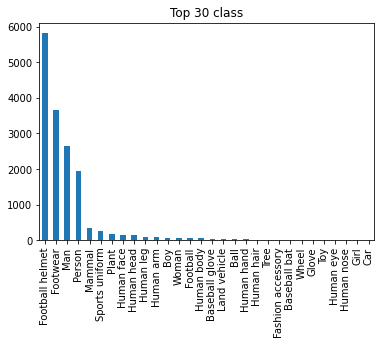

In [18]:
import matplotlib.pyplot as plt
df['category_name'] = df['category_id'].apply(lambda x : data['categories'][x]['name'] )
df['category_name'].value_counts()[:30].plot.bar()
plt.title('Top 30 class')
plt.show()

> Ici, nous allons faire le choix de nous intéresser qu'aux objets "Human body" (id:261) et "Humain head" (id:268).

* **(e)** Exécuter la cellule suivante pour selectioner uniquement ces deux objets, et les remplacer sous l'indice 0 et 1.

In [19]:

df = df[df.category_id.isin([34, 11])]
df.category_id = df.category_id.replace([34, 11], [0, 1])

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


> Dans l'état actuel, chaque observation correspond à une annotation. Dans la suite, nous allons avoir besoin d'aller dans la maille des images (une observation correpond aux informations d'une image).

* **(f)** Exécuter la cellule suivante pour aggréger les données dans la maille des images.

In [20]:
df_group = df.groupby("id_x").agg({"file_name":"min", "image_id":"count", "height":"min", "width":"min", "bbox_normilized":list, "category_id":list})
df_group

,file_name,image_id,height,width,bbox_normilized,category_id
id_x,,,,,,
1,00068e29e2ae4789.jpg,1,683,1024,"[[0.104128, 0.499375, 0.28424, 0.6075]]",[1]
2,000a53bd9f355f07.jpg,128,768,1024,"[[0.005208, 0.0, 0.06901, 0.038086], [0.139323...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,001881774bbb2341.jpg,3,1024,731,"[[0.21625, 0.378284, 0.3325, 0.54028], [0.2562...","[1, 1, 1]"
4,00225b2cdfee3b36.jpg,7,680,1024,"[[0.130885, 0.0, 0.248588, 0.031875], [0.05178...","[1, 1, 1, 1, 1, 1, 1]"
5,0025992554aa14cd.jpg,5,683,1024,"[[0.269231, 0.169375, 0.380863, 0.245], [0.287...","[1, 1, 1, 1, 1]"
...,...,...,...,...,...,...
996,5f1ffe298a855263.jpg,7,1024,819,"[[0.071289, 0.072039, 0.310547, 0.442002], [0....","[1, 0, 0, 0, 1, 1, 1]"
997,5f27d338fa3fc6a3.jpg,1,681,1024,"[[0.048589, 0.534375, 0.567398, 0.80625]]",[1]
998,5fca8ae77296faaa.jpg,22,559,1024,"[[0.099656, 0.05875, 0.915235, 0.775], [0.8327...","[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."


* **(g)** Exécuter la cellule suivante pour afficher une des images annontées.

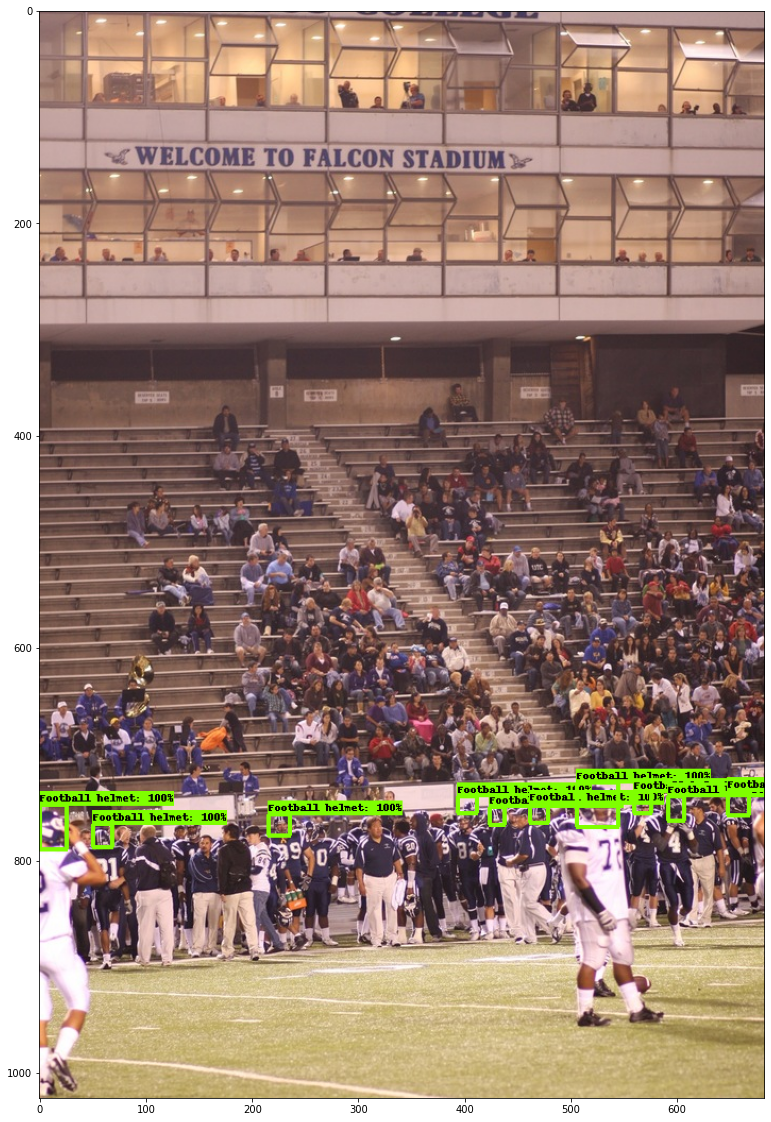

In [21]:
%matplotlib inline
from object_detection.utils import visualization_utils as viz_utils
import matplotlib.pyplot as plt
from object_detection.utils import label_map_util
import numpy as np
import cv2

# Define relation index/name object
category_index = {0: {'id': 0, 'name': 'Person'}, 1: {'id': 1, 'name': 'Football helmet'}}
# category_index = dict(list(zip(list(map(lambda x : x['id'], data['categories'])), data['categories'])))

# Select a observation
idx = 10
observation = df_group.iloc[idx]

# Load the image and convert it into RGB
img = cv2.imread(folder_data+"data/"+observation["file_name"])[..., ::-1]


# Overwrite the image to add annotation
image_np_with_detections = img.copy()
viz_utils.visualize_boxes_and_labels_on_image_array(
      image_np_with_detections,
      np.array(observation["bbox_normilized"]),
      np.array(observation["category_id"]),
      np.ones(len(observation["category_id"])),
      category_index,
      use_normalized_coordinates=True,
      min_score_thresh=.30)

# Show image annoted
plt.figure(figsize=(15,20))
plt.imshow(image_np_with_detections)
plt.show()

> Le modèle de détection d'objets que nous allons charger/fine tune provient de l'API de tensorflow. La liste des modèles disponibles est disponible à partir ce [lien](https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2_detection_zoo.md).
>
> Hélas, ce type de modèle **n'est pas doté** de méthode d'entraînement `fit` ou `fit_generator`. Il sera alors nécessaire de recourir aux boucles d'entraînement personnalisées.
>
> Le modèle aura besoin pour s'entraîner :
>
> * D'un **batch d'images** de forme : [nb_elements, dim_x, dim_y, 3]
>
>
>* De la liste des **coordonnées de chaque objet** :
>
> ```python
>[
> # First image
> [[0.14961833, 0.30982906, 0.7969466, 0.6880342], # coordinate object
>  [0.1480916, 0.3974, 0.31603053, 0.5811966]], # coordinate object
> # Seconde image
> [[0.16666667, 0.0, 1.0, 0.178125], # coordinate object
>  [0.34791, 0.13125, 0.87916666, 0.7515625], # coordinate object
>  [0.31666666, 0.5890625, 0.5229167, 0.740625]] # coordinate object
>...
>]
>```
>
>
> * De la liste des **classes de chaque objets** sous format one hot  :
>
> ```python
>[
> # First image
> [[1.0, 0.0], # class object
>  [0.0, 1.0]], # class object
> # Seconde image
> [[1.0, 0.0], # class object
>  [1.0, 0.0], # class object
>  [0.0, 1.0]] # class object
>...
>]
>```
>
> Comme la forme d'entrée peut varier en fonction du nombre d'objet par image, rendant les datasets de tensorflow plus difficile d'utilisation, nous allons faire le choix de définir un générateur personnalisé.

* **(h)** Exécuter la cellule suivante pour définir notre générateur.

In [22]:
import tensorflow as tf


import numpy as np

class DataGenerator(tf.keras.utils.Sequence):
    
    def __init__(self, df,
                 batch_size,
                 folder_image,
                 nb_class = 2,
                 input_size=(128, 128, 3),
                 shuffle=True):
        
        self.df = df.copy()
        self.batch_size = batch_size
        self.folder_image = folder_image
        self.nb_class = nb_class
        self.input_size = input_size
        self.shuffle = shuffle
        self.n = len(self.df)
        
    
    def on_epoch_end(self):
        if self.shuffle:
            self.df = self.df.sample(frac=1)
    
    def __get_input(self, path, target_size):
        # Load the image
        image = tf.keras.preprocessing.image.load_img(self.folder_image + path)
        # Convert to array
        image_arr = tf.keras.preprocessing.image.img_to_array(image)
        # resize it
        image_arr = tf.image.resize(image_arr, (target_size[0], target_size[1])).numpy()
        
        return image_arr
    
    def __get_output(self, label, num_classes):
        return tf.keras.utils.to_categorical(label, num_classes=num_classes)
    

    def __getitem__(self, index):
        # Select the batch of data
        batches = self.df.iloc[index * self.batch_size: (index + 1) * self.batch_size]

        X_batch = []
        # Load images  
        for path in batches["file_name"] :
            im = self.__get_input(path, target_size=self.input_size)
            X_batch.append(im)

        # Coordinate label
        gt_box_tensors =[gt_box_np for gt_box_np in batches['bbox_normilized']]

        # Class Label
        gt_classes_one_hot_tensors = [tf.one_hot(gt_label_np, self.nb_class).numpy() for gt_label_np in batches['category_id']]
    
        return np.array(X_batch), gt_box_tensors, gt_classes_one_hot_tensors
    
    def __len__(self):
        return self.n // self.batch_size
    
batch_size = 8
dataTrain = DataGenerator(df_group, batch_size=batch_size, folder_image=folder_data+"data/")

<hr style="border-width:2px;border-color:#75DFC1">
<h2 style = "text-align:center" > 3. Modélisation </h2>
<hr style="border-width:2px;border-color:#75DFC1">


> Pour rappel, l'API de tensorflow propose une liste exhaustive de modèles pré-entraînés : https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2_detection_zoo.md
>
>
> <img src='https://assets-datascientest.s3.eu-west-1.amazonaws.com/notebooks/object_detection_dl_model.png' style='width:300px'>
><center> <b> Figure :</b> Liste des modèles disponibles sur l'<a href="https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2_detection_zoo.md"> API de tensorflow</a> </center>
>
>
> Les colonnes du tableau correspondent : 
>
> * **Model name** : Indicant le type de modèles utilisés (Yolo, R-CNN, SSD...), le backbone utilisé et la taille d'entrée des données. Le lien permet de télécharger le modèle.
>
> * **Speed** : Vitesse d'inférence sur une machine spécifique.
>
>
>* **COCO mAP** : Performance du modèle sur le jeu de donnée COCO.
>
>
>* **Outputs** : Type de prédiction du modèle.
>
>
> Pour utiliser le modèle, il sera nécessaire de mettre le checkpoint du modèle dans le dossier *models/research/object_detection/test_data*.

* **(a)** Exécuter la cellule suivante pour télécharger un des modèles, décompresser et placer le checkpoint dans le bon dossier.

In [23]:
# Download the checkpoint and put it into models/research/object_detection/test_data/
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz
!tar -xf ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz
!mv ssd_resnet50_v1_fpn_640x640_coco17_tpu-8/checkpoint models/research/object_detection/test_data/

--2022-08-11 10:27:01--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.251.120.128, 2607:f8b0:4001:c56::80
Connecting to download.tensorflow.org (download.tensorflow.org)|142.251.120.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 244817203 (233M) [application/x-tar]
Saving to: ‘ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz’

ssd_resnet50_v1_fpn 100%[===================>] 233.48M   217MB/s    in 1.1s    

2022-08-11 10:27:03 (217 MB/s) - ‘ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz’ saved [244817203/244817203]



> Pour facilité l'utisation des modèles, l'api de détection d'objet de tensorflow utilise des **pipelines** contenant : le **prétraitement des données**, un système d'**augmenatation de données**, le **modèle** et les **fonctions de pertes**, ainsi que le **post traitement** avec la non max suppression.
>
> Les configurations des modèles se trouvent dans le dossier "models/research/object_detection/configs/tf2/".

* **(b)** Exécuter la cellule suivante pour charger le fichier config de notre modèle téléchagé plus haut.

In [24]:
from object_detection.utils import config_util
pipeline_config = 'models/research/object_detection/configs/tf2/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.config'
# Load the config model, and override it to adapt it on the case
configs = config_util.get_configs_from_pipeline_file(pipeline_config)
configs

{'eval_config': metrics_set: "coco_detection_metrics"
 use_moving_averages: false,
 'eval_input_config': label_map_path: "PATH_TO_BE_CONFIGURED/label_map.txt"
 shuffle: false
 num_epochs: 1
 tf_record_input_reader {
   input_path: "PATH_TO_BE_CONFIGURED/val2017-?????-of-00032.tfrecord"
 },
 'eval_input_configs': [label_map_path: "PATH_TO_BE_CONFIGURED/label_map.txt"
 shuffle: false
 num_epochs: 1
 tf_record_input_reader {
   input_path: "PATH_TO_BE_CONFIGURED/val2017-?????-of-00032.tfrecord"
 }
 ],
 'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 640
       width: 640
     }
   }
   feature_extractor {
     type: "ssd_resnet50_v1_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 0.00039999998989515007
         }
       }
       initializer {
         truncated_normal_initializer {
           mean: 0.0
           stddev: 0.029999999329447746
   

> Il est très facile de changer le fichier config pour l'adapter à notre tâche.

* **(c)** Exécuter la cellule suivante pour changer quelques éléments dans le dictionnaire de config.

In [25]:
num_classes = 2

# Override it to adapt it on the case
model_config = configs['model']
# Override the numbrer of class
model_config.ssd.num_classes = num_classes
# Freeze the batchnorm layer in fine tuning.
model_config.ssd.freeze_batchnorm = True

> La fonction `build` de **`model_builder`** permet de construire le modèle en fonction fichier **`model_config`**.

* **(d)** Exécuter la cellule suivante pour constuire notre modèle sous le nom **`detection_model`**.

In [26]:
from object_detection.builders import model_builder

# Clear all state in tensorflow
tf.keras.backend.clear_session()

# Build the model
detection_model = model_builder.build(
      model_config=model_config, is_training=True)

> La méthode [`Checkpoint`](https://www.tensorflow.org/api_docs/python/tf/train/Checkpoint) de **`tensorflow`** gère la sauvegarde/restoration des variables d'un modèle. Il existe un ensemble d'argument pour renseigner les bonnes correspondances entre les variables.
>
>```python
ckpt = tf.compat.v2.train.Checkpoint(
      _base_tower_layers_for_heads = detection_model._box_predictor._base_tower_layers_for_heads,
    _box_prediction_head=detection_model._box_predictor._box_prediction_head,
    )
```
>
>
> Une fois le Checkpoint bien défini, la méthode `restore` du Checkpoint fait le lien et restore les variables du modèle. Ajouter une méthode `expect_partial`permet de cacher les avertissements correspondants à la restaurations de point de contrôle incomplètes.
>```python
ckpt.restore(checkpoint_path).expect_partial()
```

* **(e)** Exécuter la cellule suivante pour restorer nos poids de modèles. Nous allons faire le choix de ne pas restorer la tête correspondant à la classification des objets.

In [27]:
print('Restoring weights for fine-tuning...', flush=True)

checkpoint_path = 'models/research/object_detection/test_data/checkpoint/ckpt-0'

# Checkpoint for box predictor
ckpt_box_predictor = tf.compat.v2.train.Checkpoint(
    # Restore the base head
    _base_tower_layers_for_heads=detection_model._box_predictor._base_tower_layers_for_heads,
    # Restore the classification head
    # _prediction_heads=detection_model._box_predictor._prediction_heads,
    # Restore the regression head
    _box_prediction_head=detection_model._box_predictor._box_prediction_head,
    )

# Checkpoint for the model
ckpt_model = tf.compat.v2.train.Checkpoint(
          # Restore the backbone
          _feature_extractor=detection_model._feature_extractor,
          # Box predictor checkpoint
          _box_predictor=ckpt_box_predictor)

# Checkpoint for the final model
ckpt = tf.compat.v2.train.Checkpoint(model=ckpt_model)

# Restore the weight of the model
ckpt.restore(checkpoint_path).expect_partial()


# Run model through a dummy image so that variables are created
image, shapes = detection_model.preprocess(tf.zeros([1, 640, 640, 3]))
prediction_dict = detection_model.predict(image, shapes)
_ = detection_model.postprocess(prediction_dict, shapes)

print('Weights restored!')

Restoring weights for fine-tuning...
Weights restored!


> Maintenant que le modèle est chargé, entrainons le sur notre tâche.

### Variables à Fine tune

> Pour fine tune un modèle pré-entraîné, il est coutume de freeze les couches d'extraction de caractéristiques (backbone...).
>
> C'est pourquoi, nous allons faire le choix d'entraîner uniquement la tête de détection ainsi que la tête de classification.


* **(f)** Exécuter la cellule suivante pour stocker toutes les variables à entraîner dans la liste **`to_fine_tune`**.

In [28]:
tf.keras.backend.set_learning_phase(True)

# Select trainable variables.
trainable_variables = detection_model.trainable_variables

prefixes_to_train = [
  'WeightSharedConvolutionalBoxPredictor/WeightSharedConvolutionalBoxHead',
  'WeightSharedConvolutionalBoxPredictor/WeightSharedConvolutionalClassHead']

to_fine_tune = []
# Select each variable with a prefixe from prefixes_to_train
for var in trainable_variables:
    if any([var.name.startswith(prefix) for prefix in prefixes_to_train]):
        to_fine_tune.append(var)

/usr/local/lib/python3.7/dist-packages/keras/backend.py:414: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '


### Fonction d'entraînement

>  Pour rappel, tensorflow permet de personaliser tout le processus d'entraînement :
>
>```python
># Record every operation in GradientTape
>with tf.GradientTape() as tape:
>    # Model prediction.
>    y_pred = model(X)
>    # Compute the loss function.
>    loss_value = loss(y_true, y_pred)
>
># Compute the gradient function thanks to GradientTape
>grads = tape.gradient(loss_value, parameters_to_train)
>
># Update the weights of the model.
>optimizer.apply_gradients(zip(grads, parameters_to_train))
>```
>
>Ici, commme **`detection_model`** est un pipeline, il est dôté des méthodes suviantes : 
>
> * `preprocess` : Normalise des images du lot de données.
>
>
> * `predict` : Prédit sour le format de dictionnaire les sorties du modèle
>
>
> * `provide_groundtruth` : Fournit la vraie cible au modèle. Indispensable pour calculer la fonction de perte `loss`.
>
>
> * `loss` : Prédit sous le format de dictionnaire les valeurs des différentes fonctions de perte renseignées dans le fichier config. Ici, les valeurs des clés 'Loss/localization_loss' et 'Loss/classification_loss' correspondent respectivement à la fonction de perte de localisation et de classification.

* **(g)** Exécuter la cellule suivante pour définir notre fonction d'entraînement

In [29]:
# Set up forward + backward pass for a single train step.
def get_model_train_step_function(model, optimizer, vars_to_fine_tune):
    """Get a tf.function for training step."""

    # Use tf.function for a bit of speed.
    # Comment out the tf.function decorator if you want the inside of the
    # function to run eagerly.
    # @tf.function
    def train_step_fn(image_tensors,
                    groundtruth_boxes_list,
                    groundtruth_classes_list):
        """A single training iteration.

        Args:
          image_tensors: A list of [1, height, width, 3] Tensor of type tf.float32.
            Note that the height and width can vary across images, as they are
            reshaped within this function to be 640x640.
          groundtruth_boxes_list: A list of Tensors of shape [N_i, 4] with type
            tf.float32 representing groundtruth boxes for each image in the batch.
          groundtruth_classes_list: A list of Tensors of shape [N_i, num_classes]
            with type tf.float32 representing groundtruth boxes for each image in
            the batch.

        Returns:
          A scalar tensor representing the total loss for the input batch.
        """
        # Shape of images
        shapes = tf.constant(batch_size * [[128, 128, 3]], dtype=tf.int32)

        

        # Give true target  to the model
        model.provide_groundtruth(
            groundtruth_boxes_list=groundtruth_boxes_list,
            groundtruth_classes_list=groundtruth_classes_list)
        
        with tf.GradientTape() as tape:
            # Prepross input adaptative to different shape of images
            preprocessed_images = tf.concat(
              [detection_model.preprocess(tf.expand_dims(image_tensor,0))[0]
               for image_tensor in image_tensors], axis=0)
            # preprocessed_images = detection_model.preprocess(tf.convert_to_tensor(image_tensors, tf.float32))
            # Predict values
            prediction_dict = model.predict(preprocessed_images, shapes)
            # Compute losses
            losses_dict = model.loss(prediction_dict, shapes)
            # Extract localization_loss and classification_loss
            total_loss = losses_dict['Loss/localization_loss'] + losses_dict['Loss/classification_loss']

        # Compute the gradient
        gradients = tape.gradient(total_loss, vars_to_fine_tune)
        # Apply Back propagation
        optimizer.apply_gradients(zip(gradients, vars_to_fine_tune))
        return total_loss 

    return train_step_fn


> Maintenant que le modèle est défini, chargé et que la fonction d'entraînement est défini, il ne reste plus qu'à entraîner le modèle.

* **(h)** Exécuter la cellule suivante pour entraîner le modèle.

In [30]:
from tqdm import tqdm
EPOCHS = 10
learning_rate = 0.001

# Define optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

# Training function
train_step_fn = get_model_train_step_function(
    detection_model, optimizer, to_fine_tune)

# Train the model
for i in range(EPOCHS):
    for image_tensors, gt_boxes_list, gt_classes_list in tqdm(dataTrain) :
        # Convert localisation of box to tensor
        gt_boxes_list =[tf.convert_to_tensor(gt_box_np, dtype=tf.float32) for gt_box_np in gt_boxes_list]
        # Convert class of box to tensor
        gt_classes_list =[tf.convert_to_tensor(gt_class_np, dtype=tf.float32) for gt_class_np in gt_classes_list]
        # Compute the training function
        total_loss = train_step_fn(image_tensors, gt_boxes_list, gt_classes_list)
    # Show the loss of the last batch
    print('Epoch ' + str(i) + ', loss=' +  str(total_loss.numpy()),flush=True)

  1%|          | 1/125 [02:16<4:42:18, 136.60s/it]


KeyboardInterrupt: ignored

> Le modèle est maintenant entraîné, il ne reste plus qu'à définir le processus d'inférence. Pour obtenir le même résultat qu'un modèle d'inférence, il sera nécessaire de :
> * 1. **Prétraiter** l'image d'entrée : normalisation
>
>```python
>preprocessed_image, shapes = detection_model.preprocess(input_tensor)
>```
>
>
> * 2. **Prédire les objets** dans l'image
>
>```python
>prediction_dict = detection_model.predict(preprocessed_image, shapes)
>```
>
>
> 3. **Post-traiter** la sortie du modèle : non maximum suppresion
>
>```python
>prediction_final_dict = detection_model.postprocess(prediction_dict, shapes)
>```

* **(i)** Exécuter la cellule suivante pour définir la fonction `detection` ainsi qu'afficher la sortie pour une des images de notre jeu de données.

In [ ]:
def detect(input_tensor):
  """Run detection on an input image.

  Args:
    input_tensor: A [1, height, width, 3] Tensor of type tf.float32.
      Note that height and width can be anything since the image will be
      immediately resized according to the needs of the model within this
      function.

  Returns:
    A dict containing 3 Tensors (`detection_boxes`, `detection_classes`,
      and `detection_scores`).
  """
  preprocessed_image, shapes = detection_model.preprocess(tf.convert_to_tensor(input_tensor, tf.float32))
  prediction_dict = detection_model.predict(preprocessed_image, shapes)
  return detection_model.postprocess(prediction_dict, shapes)

detect(np.expand_dims(img, 0))

* **(j)** Exécuter la cellule suivante pour afficher la prédiction du modèle.

In [ ]:
def show_img(img, detector, threshold=0.3):
    detector_output = detector(np.expand_dims(img, axis=0))
    detector_output = {key:value.numpy() for key,value in detector_output.items()}
    
    image_np_with_detections = img.copy()

    # Use keypoints if available in detections
    keypoints, keypoint_scores = None, None

    if 'detection_keypoints' in detector_output:
        keypoints = detector_output['detection_keypoints'][0]
        keypoint_scores = detector_output['detection_keypoint_scores'][0]

    viz_utils.visualize_boxes_and_labels_on_image_array(
          image_np_with_detections,
          detector_output['detection_boxes'][0],
          (detector_output['detection_classes'][0]+0).astype(int),
          detector_output['detection_scores'][0],
          category_index,
          use_normalized_coordinates=True,
          max_boxes_to_draw=50,
          min_score_thresh=threshold,
          agnostic_mode=False)
    
    plt.figure(figsize=(15,15))
    plt.imshow(image_np_with_detections)
    plt.show()
    
show_img(img, detect, threshold=0.1)

* **(k)** Tester votre modèles sur d'autres images

In [ ]:
import cv2, urllib

def url_to_image(url):
    resp = urllib.request.urlopen(url) 
    img = np.asarray(bytearray(resp.read()), dtype="uint8")
    img = cv2.imdecode(img, -1)
    img = img[..., [2,1,0]]
    return img

img2 = url_to_image("http://cdn.playbuzz.com/cdn/2361ba95-3be3-4f7d-b0a0-542155824490/495210c5-f896-41e2-8d27-3c093460c7a4.jpg")
show_img(img2, detect, threshold=0.3)

In [ ]:
img2 = url_to_image("https://thumbs.dreamstime.com/b/american-football-match-wolves-blue-dragon-belgrade-serbia-may-belgrade-belgrade-team-winner-50415289.jpg")
show_img(img2, detect, threshold=0.3)

In [ ]:
img2 = url_to_image("https://thumbs.dreamstime.com/b/american-football-match-wolves-blue-dragon-belgrade-serbia-may-belgrade-belgrade-team-winner-50415289.jpg")
show_img(img2, detect, threshold=0.4)

In [ ]:
new_pipeline_proto = config_util.create_pipeline_proto_from_configs(configs)


In [ ]:
config_util.save_pipeline_config(new_pipeline_proto, '/content/new_config')



In [ ]:
exported_ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt_manager = tf.train.CheckpointManager(
exported_ckpt, directory="/content/new_config/checkpoint/", max_to_keep=5)
ckpt_manager.save()